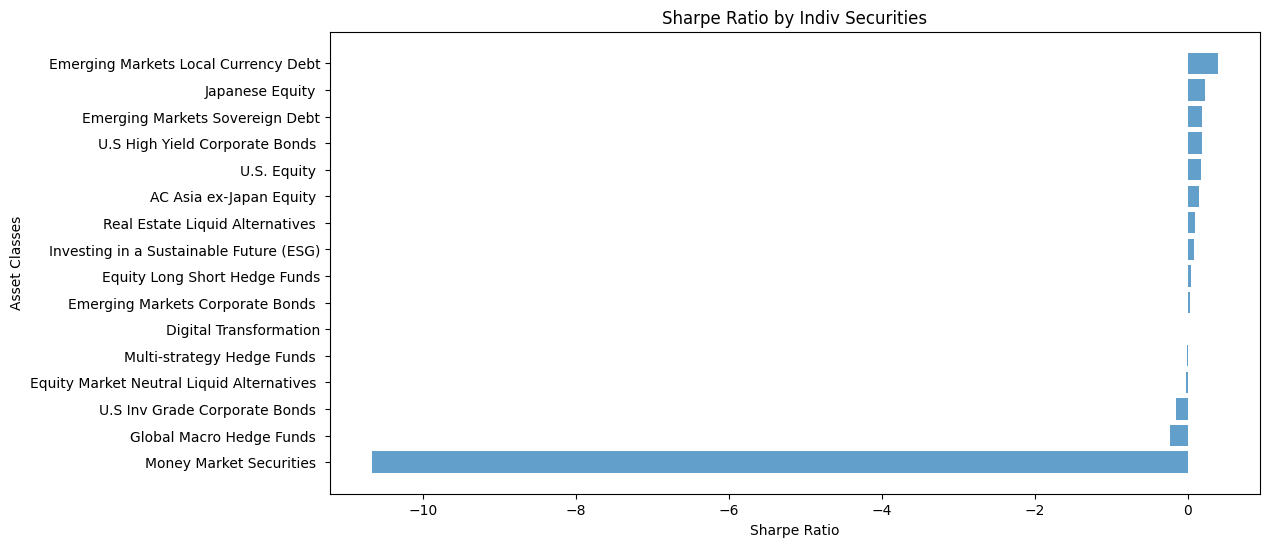

Fixed Income 0.032
Equities 0.0561
Fixed Income 0.057
Fixed Income 0.0846
Equities 0.042
Equities 0.008
Alternatives 0.0655
Thematics 0.0886
Alternatives 0.07
Fixed Income 0.0394
Thematics 0.0465
Alternatives 0.0294
Alternatives 0.0556
Fixed Income 0.0373
Alternatives 0.042
Fixed Income 0.0562
----


In [587]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("APPENDIX DATA.xlsx", sheet_name="ReturnData")

risk_free_rate =0.04
df['Sharpe Ratio'] = (df['Expected Return'] - risk_free_rate) / df['Expected Volatility']
df = df.sort_values(by='Sharpe Ratio', ascending=False)
plt.figure(figsize=(12, 6))
plt.barh(df['Security'], df['Sharpe Ratio'], alpha=0.7)
plt.xlabel('Sharpe Ratio')
plt.ylabel('Asset Classes')
plt.title('Sharpe Ratio by Indiv Securities')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest Sharpe Ratio at the top
plt.show()

for i, asset in enumerate(df["Asset Classes"]):
    print(asset, df["Expected Return"][i])
print("----")


{'whiskers': [<matplotlib.lines.Line2D at 0x13d38cd50>,
 'caps': [<matplotlib.lines.Line2D at 0x13d3cce90>,
 'boxes': [<matplotlib.lines.Line2D at 0x13d38f210>],
 'medians': [<matplotlib.lines.Line2D at 0x13d3cee90>],
 'fliers': [<matplotlib.lines.Line2D at 0x13d52a7d0>],
 'means': []}

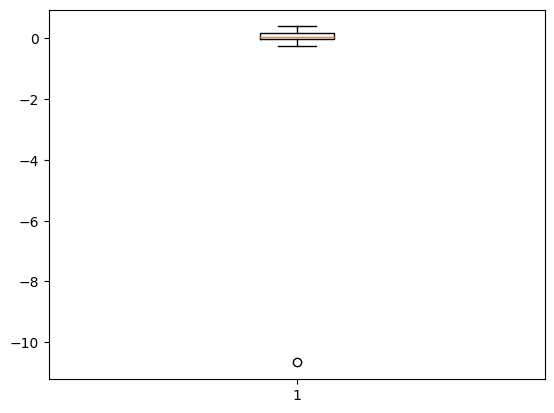

In [588]:
plt.boxplot(df["Sharpe Ratio"])

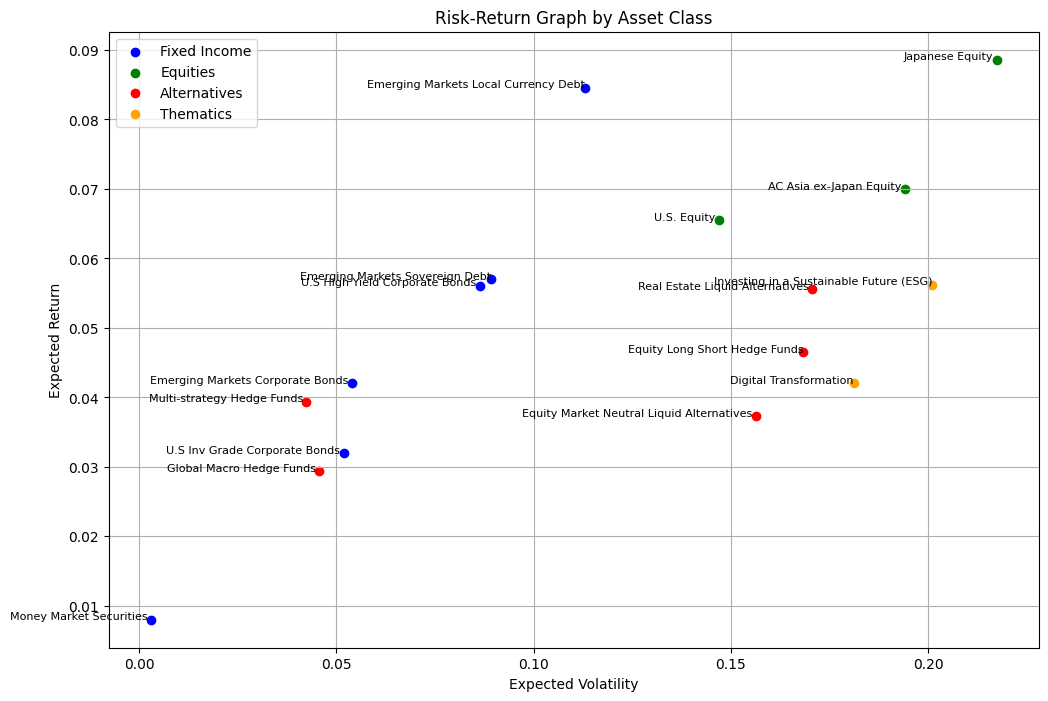

In [589]:
from sklearn.cluster import KMeans

# Create a color map for asset classes
colors = {
    "Fixed Income": "blue",
    "Equities": "green",
    "Alternatives": "red",
    "Thematics": "orange"
}

# Create a scatter plot for risk-return graph
plt.figure(figsize=(12, 8))
for asset_class, color in colors.items():
    asset_class_data = df[df["Asset Classes"] == asset_class]
    plt.scatter(
        asset_class_data["Expected Volatility"],
        asset_class_data["Expected Return"],
        label=asset_class,
        color=color,
        marker="o",
    )

# Add labels to data points (individual securities)
for i, asset in df.iterrows():
    plt.annotate(asset["Security"], (asset["Expected Volatility"], asset["Expected Return"]), fontsize=8, ha="right")

plt.xlabel("Expected Volatility")
plt.ylabel("Expected Return")
plt.title("Risk-Return Graph by Asset Class")
plt.legend()
plt.grid(True)
plt.show()

    Weight (Digital Transformation)  Weight (Sustainable Future)  \
45                             0.45                         0.55   

    Expected Return  Expected Volatility  
45          0.04839             0.134616  


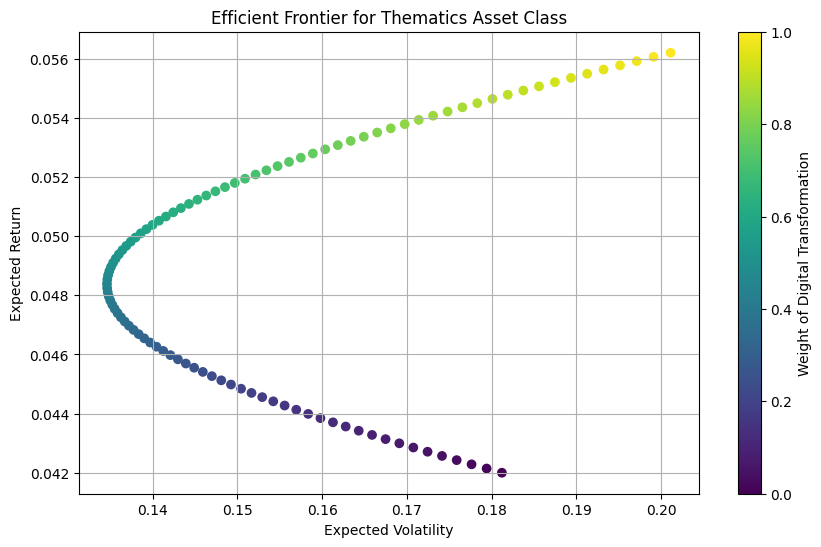

In [590]:
data = df[df["Asset Classes"] == "Thematics"]
data


# Define the range of weights for one asset
weights_digital_transformation = np.arange(0, 1.01, 0.01)

# Initialize lists to store portfolio metrics
portfolio_returns = []
portfolio_volatilities = []
portfolio_weights_digital_transformation = []

# Calculate portfolio metrics for each weight combination
for weight_digital_transformation in weights_digital_transformation:
    weight_sustainable_future = 1 - weight_digital_transformation

    # Calculate portfolio expected return as a weighted average
    portfolio_return = (
        weight_digital_transformation * data["Expected Return"].values[0] +
        weight_sustainable_future * data["Expected Return"].values[1]
    )

    # Calculate portfolio expected volatility as a weighted average
    portfolio_volatility = np.sqrt(
        (weight_digital_transformation * data["Expected Volatility"].values[0]) ** 2 +
        (weight_sustainable_future * data["Expected Volatility"].values[1]) ** 2
    )

    portfolio_returns.append(portfolio_return)
    portfolio_volatilities.append(portfolio_volatility)
    portfolio_weights_digital_transformation.append(weight_digital_transformation)

# Create a DataFrame to store the results
portfolio_df = pd.DataFrame({
    "Weight (Digital Transformation)": portfolio_weights_digital_transformation,
    "Weight (Sustainable Future)": [1 - w for w in portfolio_weights_digital_transformation],
    "Expected Return": portfolio_returns,
    "Expected Volatility": portfolio_volatilities
})

# Identify portfolios on the efficient frontier (e.g., those with the minimum volatility)
efficient_frontier_df = portfolio_df[portfolio_df["Expected Volatility"] == min(portfolio_df["Expected Volatility"])]

# Display the table of portfolios on the efficient frontier
print(efficient_frontier_df)

# Plot the Efficient Frontier
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_volatilities, portfolio_returns, c=portfolio_weights_digital_transformation, cmap='viridis', marker='o')
plt.colorbar(label='Weight of Digital Transformation')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier for Thematics Asset Class')
plt.grid(True)
plt.show()






## Get Allocation of Securities within Asset Class

In [591]:

def get_securities_allocation(data):
    # Define an objective function to minimize - Sharpe ratio in this case
    def calculate_portfolio_metrics(weights, expected_returns, expected_volatilities, risk_free_rate):
        portfolio_return = np.sum(weights * expected_returns)
        portfolio_volatility = np.sqrt(np.dot(weights, np.dot(np.diag(expected_volatilities), weights)))
        sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
        return -sharpe_ratio  # Minimize negative Sharpe ratio for optimization

    # Define optimization constraints (sum of weights should be 1)
    constraints = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}

    # Define optimization bounds (weights should be between 0 and 1)
    bounds = tuple((0, 1) for _ in range(len(data)))

    # Define risk-free rate (you can set this to your chosen rate)
    risk_free_rate = 0.04

    # Initialize weights for optimization
    initial_weights = np.array([1 / len(data)] * len(data))

    # Perform optimization to maximize Sharpe ratio
    result = minimize(calculate_portfolio_metrics, initial_weights, args=(
        np.array([security["Expected Return"] for i, security in data.iterrows()]),
        np.array([security["Expected Volatility"] for i,security in data.iterrows()]),
        risk_free_rate
    ), method='SLSQP', bounds=bounds, constraints=constraints)

    # Get optimized portfolio weights
    optimized_weights = result.x

    # Print the optimized weights
    for i, security in data.iterrows():
        print(f"{security['Security']}: {optimized_weights[i] * 100:.2f}%")

    # Print the maximum Sharpe ratio achieved
    print(f"Maximum Sharpe Ratio: {-result.fun:.4f}")

In [592]:

data_fixed_income = df[df["Asset Classes"] == "Fixed Income"]
data_fixed_income

get_securities_allocation(data_fixed_income)

Emerging Markets Local Currency Debt: 4.52%
Emerging Markets Sovereign Debt: 23.13%
U.S High Yield Corporate Bonds : 23.63%
Emerging Markets Corporate Bonds : 0.00%
U.S Inv Grade Corporate Bonds : 48.72%
Money Market Securities : 0.00%
Maximum Sharpe Ratio: 0.1546


## Efficient Frontier 

In [593]:
def get_table_portfolios(data, asset_class):

    # Extract expected returns and volatilities into arrays
    expected_returns = np.array([security["Expected Return"] for i,security in data.iterrows()])
    expected_volatilities = np.array([security["Expected Volatility"] for i, security in data.iterrows()])
    p_ret = [] # Define an empty array for portfolio returns
    p_vol = [] # Define an empty array for portfolio volatility
    p_weights = [] # Define an empty array for asset weights
    num_securities = len(expected_returns)
    print(num_securities)
    num_portfolios = 10000
    for portfolio in range(num_portfolios):
        weights = np.random.random(num_securities)
        # print(weights)?
        weights = weights/np.sum(weights)
        p_weights.append(weights)
        returns = np.dot(weights, expected_returns) # Returns are the product of individual expected returns of asset and its 
                                        # weights 
        p_ret.append(returns)
        volatility = np.sqrt(np.dot(weights ** 2, expected_volatilities ** 2 ))
        p_vol.append(volatility)
    
    results_data = {'Returns':p_ret, 'Volatility':p_vol}


    for i, security in data.iterrows():
        asset_name = security["Security"]
        weights_column_name = f"{asset_name} Weight"
        weights = [weights[i] for weights in p_weights]
        results_data[weights_column_name] = weights

    portfolios = pd.DataFrame(results_data)
    # portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])
    # plotting the minimum volatility portfolio
    # Plotting optimal portfolio

    # Show the subplots
    plt.show()
    return portfolios



## Fixed Income

In [594]:
fixed_income_table = get_table_portfolios(data_fixed_income, "Fixed Income")

6


### Min Risk Portfolio 

In [595]:

fixed_income_min_vol_port = fixed_income_table.iloc[fixed_income_table['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
fixed_income_min_vol_port


Returns                                        0.021060
Volatility                                     0.014038
Emerging Markets Local Currency Debt Weight    0.018794
Emerging Markets Sovereign Debt Weight         0.010386
U.S High Yield Corporate Bonds  Weight         0.043709
Emerging Markets Corporate Bonds  Weight       0.222424
U.S Inv Grade Corporate Bonds  Weight          0.057985
Money Market Securities  Weight                0.646702
Name: 4780, dtype: float64

In [596]:
def frontier_plot(min_port, optimal_port, port_table,asset_class):
    plt.subplots(figsize=(10, 10))
    plt.scatter(port_table['Volatility'], port_table['Returns'],marker='o', s=10, alpha=0.3)
    plt.scatter(min_port[1], min_port[0], color='r', marker='*', s=500)
    plt.scatter(optimal_port[1], optimal_port[0], color='g', marker='*', s=500)
    plt.title(asset_class + " Min and Opt Portfolio")
    plt.show()

In [597]:
fixed_income_table.describe()

,Returns,Volatility,Emerging Markets Local Currency Debt Weight,Emerging Markets Sovereign Debt Weight,U.S High Yield Corporate Bonds Weight,Emerging Markets Corporate Bonds Weight,U.S Inv Grade Corporate Bonds Weight,Money Market Securities Weight
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.046653,0.034734,0.166845,0.166867,0.166559,0.167062,0.166875,0.165792
std,0.006012,0.006085,0.096319,0.095022,0.093474,0.094292,0.094454,0.094316
min,0.021060,0.014038,0.000112,0.000032,0.000040,0.000023,0.000008,0.000002
25%,0.042646,0.030598,0.092184,0.091481,0.092557,0.093264,0.092624,0.090895
50%,0.046639,0.034179,0.165804,0.168452,0.166434,0.167770,0.167283,0.163690
75%,0.050661,0.038183,0.232878,0.232525,0.232374,0.232779,0.232569,0.232187
max,0.069020,0.073298,0.708809,0.667517,0.528786,0.643976,0.641841,0.652665


In [598]:
def find_optimal_portfolio(portfolios, target_risk):
    # Filter portfolios that meet the desired risk criteria
    filtered_portfolios = portfolios[portfolios['Volatility']*100 < target_risk]
    
    # Find the portfolio with the highest return among the filtered portfolios
    optimal_portfolio = filtered_portfolios.loc[filtered_portfolios['Returns'].idxmax()]
    print(optimal_portfolio)
    
    # Print the optimal portfolio's details
    # print("Optimal Portfolio:")
    # print(optimal_portfolio["Returns"])
    
    return optimal_portfolio

# Example usage:
# Replace 'portfolios' with your DataFrame of calculated portfolios, and 'target_risk' with your desired risk level


In [599]:
fixed_income_table["Volatility"].describe()

count    10000.000000
mean         0.034734
std          0.006085
min          0.014038
25%          0.030598
50%          0.034179
75%          0.038183
max          0.073298
Name: Volatility, dtype: float64

### Optimal Portfolio (Target Risk 50%)

In [600]:
optimal_portfolio = find_optimal_portfolio(fixed_income_table, target_risk=4)


Returns                                        0.056263
Volatility                                     0.039195
Emerging Markets Local Currency Debt Weight    0.202617
Emerging Markets Sovereign Debt Weight         0.230744
U.S High Yield Corporate Bonds  Weight         0.215885
Emerging Markets Corporate Bonds  Weight       0.126495
U.S Inv Grade Corporate Bonds  Weight          0.217507
Money Market Securities  Weight                0.006752
Name: 8891, dtype: float64


In [601]:
fixed_income_min_vol_port = fixed_income_table.iloc[fixed_income_table['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
fixed_income_min_vol_port

Returns                                        0.021060
Volatility                                     0.014038
Emerging Markets Local Currency Debt Weight    0.018794
Emerging Markets Sovereign Debt Weight         0.010386
U.S High Yield Corporate Bonds  Weight         0.043709
Emerging Markets Corporate Bonds  Weight       0.222424
U.S Inv Grade Corporate Bonds  Weight          0.057985
Money Market Securities  Weight                0.646702
Name: 4780, dtype: float64

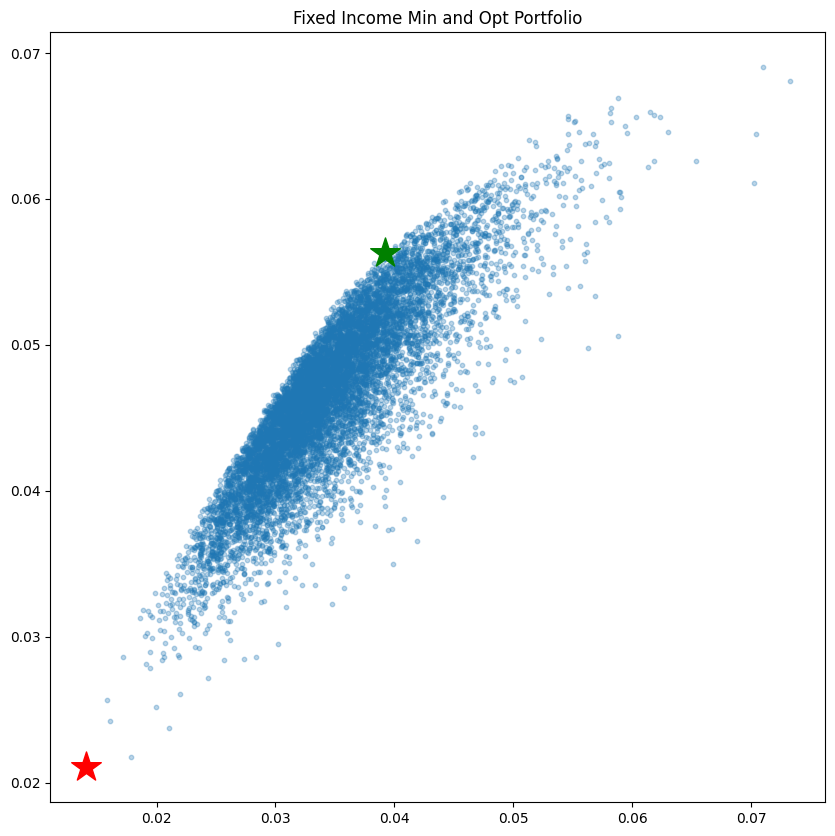

In [602]:
graph = frontier_plot(fixed_income_min_vol_port, optimal_portfolio, fixed_income_table, "Fixed Income")
graph

## Equities

In [603]:

data_equities = df[df["Asset Classes"] == "Equities"]
data_equities.reset_index(drop=True,inplace=True)
data_equities


,Asset Classes,Security,Expected Return,Expected Volatility,Sharpe Ratio
0,Equities,Japanese Equity,0.0886,0.2174,0.223551
1,Equities,U.S. Equity,0.0655,0.1470,0.173469
2,Equities,AC Asia ex-Japan Equity,0.0700,0.1941,0.154560


In [604]:
get_securities_allocation(data_equities)

Japanese Equity : 40.48%
U.S. Equity : 31.56%
AC Asia ex-Japan Equity : 27.96%
Maximum Sharpe Ratio: 0.1412


In [605]:
equity_table = get_table_portfolios(data_equities, "Equities")

3


In [606]:
equity_table["Volatility"].describe()

count    10000.000000
mean         0.122348
std          0.016559
min          0.103158
25%          0.110103
50%          0.117507
75%          0.130171
max          0.215301
Name: Volatility, dtype: float64

In [607]:
equity_optimal_portfolio = find_optimal_portfolio(equity_table, target_risk=13)


Returns                            0.078979
Volatility                         0.129874
Japanese Equity  Weight            0.539454
U.S. Equity  Weight                0.234503
AC Asia ex-Japan Equity  Weight    0.226043
Name: 4862, dtype: float64


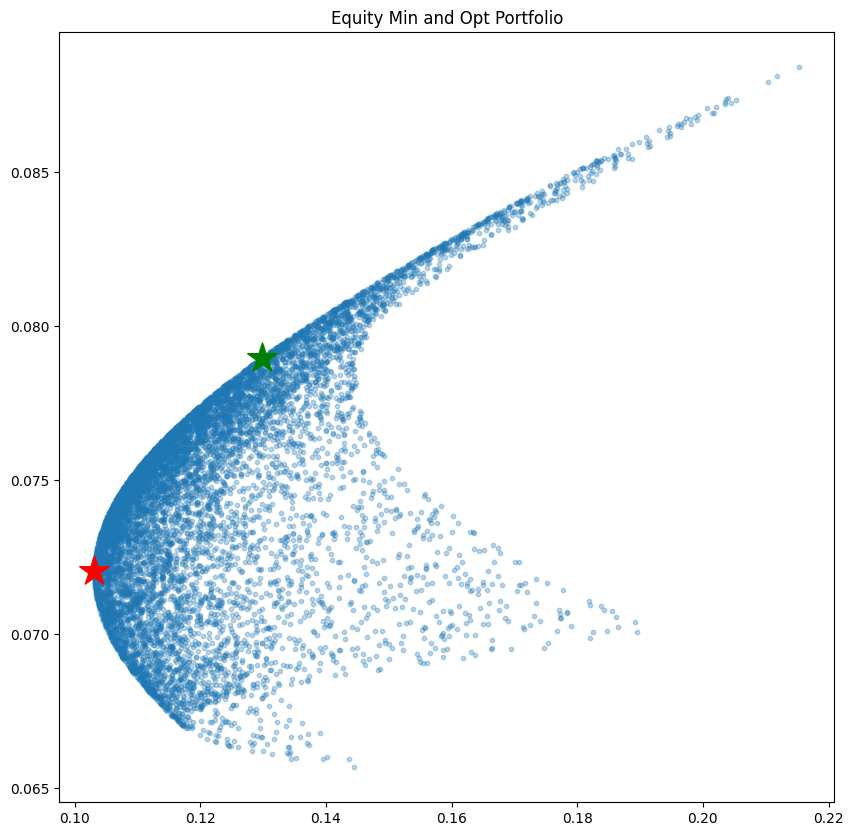

In [608]:
equity_graph = frontier_plot(equity_min_vol_port, equity_optimal_portfolio, equity_table, "Equity")
equity_graph


## Alternatives

In [609]:

data_alt = df[df["Asset Classes"] == "Alternatives"]
data_alt.reset_index(drop=True,inplace=True)
data_alt


,Asset Classes,Security,Expected Return,Expected Volatility,Sharpe Ratio
0,Alternatives,Real Estate Liquid Alternatives,0.0556,0.1707,0.091388
1,Alternatives,Equity Long Short Hedge Funds,0.0465,0.1684,0.038599
2,Alternatives,Multi-strategy Hedge Funds,0.0394,0.0424,-0.014151
3,Alternatives,Equity Market Neutral Liquid Alternatives,0.0373,0.1564,-0.017263
4,Alternatives,Global Macro Hedge Funds,0.0294,0.0456,-0.232456


In [610]:
get_securities_allocation(data_alt)

Real Estate Liquid Alternatives : 70.27%
Equity Long Short Hedge Funds: 29.73%
Multi-strategy Hedge Funds : 0.00%
Equity Market Neutral Liquid Alternatives : 0.00%
Global Macro Hedge Funds : 0.00%
Maximum Sharpe Ratio: 0.0409


In [611]:
alt_table = get_table_portfolios(data_alt,"Alternatives")


5


In [612]:
alt_table["Volatility"].describe()

count    10000.000000
mean         0.066109
std          0.013224
min          0.029651
25%          0.057359
50%          0.065271
75%          0.073865
max          0.127751
Name: Volatility, dtype: float64

In [613]:
alt_min_vol_port = alt_table.iloc[alt_table['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
alt_min_vol_port

Returns                                              0.035580
Volatility                                           0.029651
Real Estate Liquid Alternatives  Weight              0.023401
Equity Long Short Hedge Funds Weight                 0.016657
Multi-strategy Hedge Funds  Weight                   0.495872
Equity Market Neutral Liquid Alternatives  Weight    0.040956
Global Macro Hedge Funds  Weight                     0.423113
Name: 8540, dtype: float64

In [614]:
alt_optimal_portfolio = find_optimal_portfolio(alt_table, target_risk=5)
# Finding the optimal portfolio


Returns                                              0.042906
Volatility                                           0.048841
Real Estate Liquid Alternatives  Weight              0.210690
Equity Long Short Hedge Funds Weight                 0.057516
Multi-strategy Hedge Funds  Weight                   0.607942
Equity Market Neutral Liquid Alternatives  Weight    0.116793
Global Macro Hedge Funds  Weight                     0.007060
Name: 2208, dtype: float64


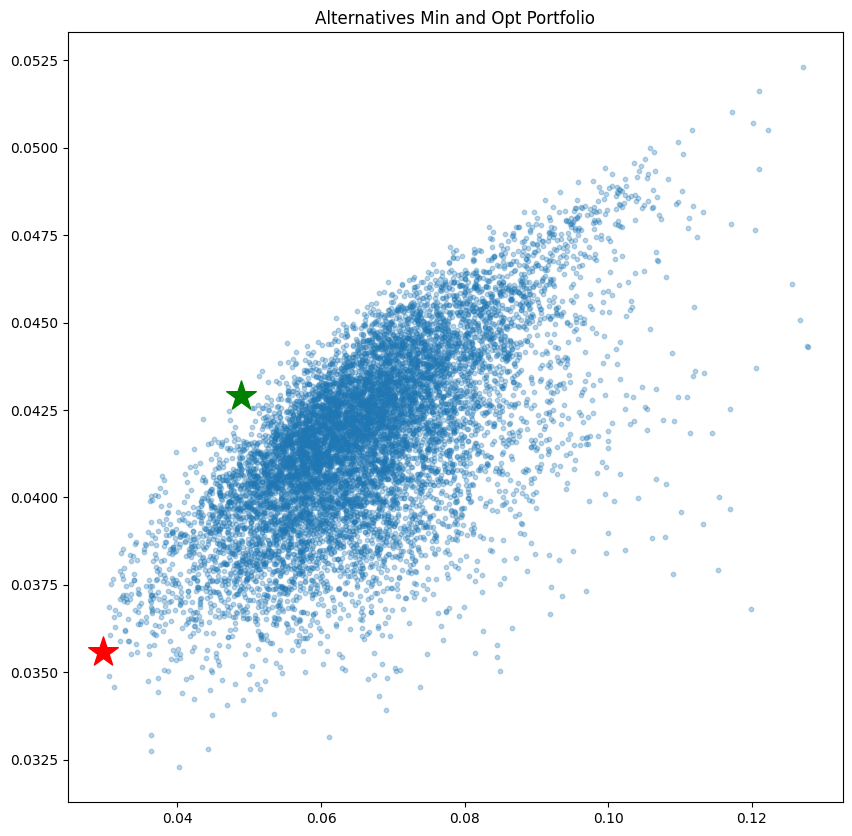

In [615]:
alt_graph = frontier_plot(alt_min_vol_port, alt_optimal_portfolio, alt_table, "Alternatives")
alt_graph

## Thematics

In [616]:
data_thematics = df[df["Asset Classes"] == "Thematics"]
data_thematics.reset_index(drop=True,inplace=True)


get_securities_allocation(data_thematics)

Investing in a Sustainable Future (ESG): 87.90%
Digital Transformation: 12.10%
Maximum Sharpe Ratio: 0.0364


In [617]:
them_table = get_table_portfolios(data_thematics, "Thematics")



2


In [622]:
them_table["Volatility"].describe()

count    10000.000000
mean         0.149334
std          0.016445
min          0.134615
25%          0.136204
50%          0.142321
75%          0.158303
max          0.201093
Name: Volatility, dtype: float64

In [618]:
them_min_vol_port = them_table.iloc[them_table['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
them_min_vol_port


Returns                                           0.048362
Volatility                                        0.134615
Investing in a Sustainable Future (ESG) Weight    0.448056
Digital Transformation Weight                     0.551944
Name: 3926, dtype: float64

In [636]:
them_optimal_portfolio = find_optimal_portfolio(them_table, target_risk=14)


Returns                                           0.050379
Volatility                                        0.139992
Investing in a Sustainable Future (ESG) Weight    0.590041
Digital Transformation Weight                     0.409959
Name: 5438, dtype: float64


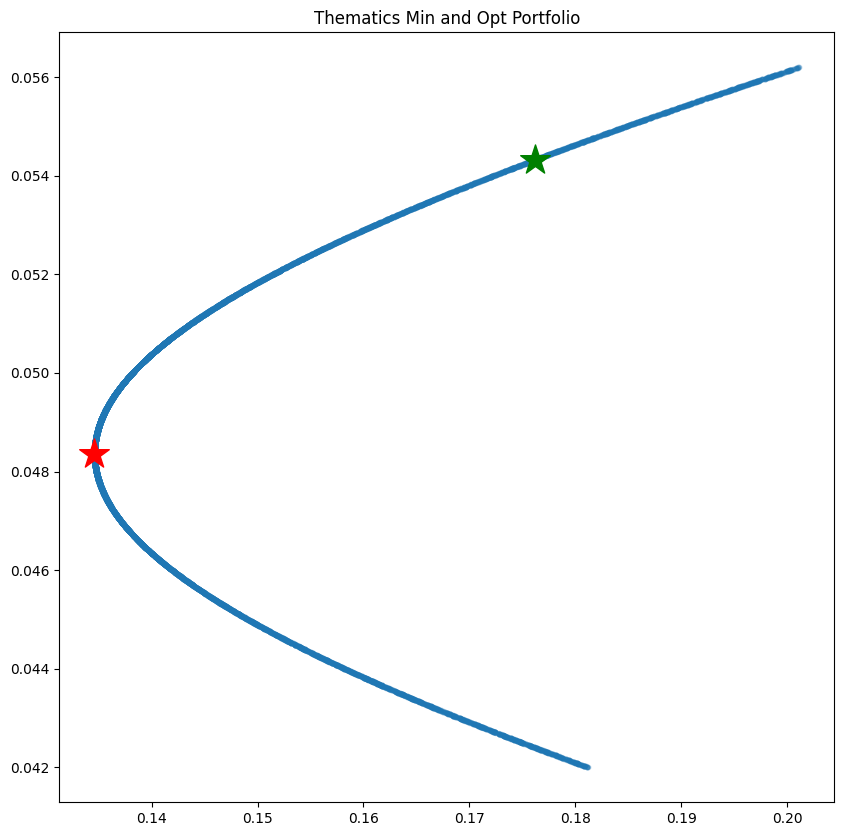

In [637]:
them_graph = frontier_plot(them_min_vol_port, them_optimal_risky_port, them_table, "Thematics")


In [638]:
## Expected Returns and Volatility for Each asset class
optimal_portfolio

Returns                                        0.056263
Volatility                                     0.039195
Emerging Markets Local Currency Debt Weight    0.202617
Emerging Markets Sovereign Debt Weight         0.230744
U.S High Yield Corporate Bonds  Weight         0.215885
Emerging Markets Corporate Bonds  Weight       0.126495
U.S Inv Grade Corporate Bonds  Weight          0.217507
Money Market Securities  Weight                0.006752
Name: 8891, dtype: float64

In [639]:
equity_optimal_portfolio

Returns                            0.078979
Volatility                         0.129874
Japanese Equity  Weight            0.539454
U.S. Equity  Weight                0.234503
AC Asia ex-Japan Equity  Weight    0.226043
Name: 4862, dtype: float64

In [640]:
alt_optimal_portfolio

Returns                                              0.042906
Volatility                                           0.048841
Real Estate Liquid Alternatives  Weight              0.210690
Equity Long Short Hedge Funds Weight                 0.057516
Multi-strategy Hedge Funds  Weight                   0.607942
Equity Market Neutral Liquid Alternatives  Weight    0.116793
Global Macro Hedge Funds  Weight                     0.007060
Name: 2208, dtype: float64

In [643]:
them_optimal_portfolio

Returns                                           0.050379
Volatility                                        0.139992
Investing in a Sustainable Future (ESG) Weight    0.590041
Digital Transformation Weight                     0.409959
Name: 5438, dtype: float64

In [646]:
import pandas as pd

# Sample data for asset classes
data = [
    {
        'Asset Class': 'Fixed Income',
        'Returns': 0.056263,
        'Volatility': 0.039195,
    },
    {
        'Asset Class': 'Equities',
        'Returns': 0.078979,
        'Volatility': 0.129874,
    },
    {
        'Asset Class': 'Alternatives',
        'Returns': 0.042906,
        'Volatility': 0.048841,
    },
    {
        'Asset Class': 'Thematics',
        'Returns': 0.050379,
        'Volatility': 0.139992,
    }
]

# Create a DataFrame from the list of dictionaries
asset_class_df = pd.DataFrame(data)

# Print the resulting DataFrame
print(asset_class_df)


    Asset Class   Returns  Volatility
0  Fixed Income  0.056263    0.039195
1      Equities  0.078979    0.129874
2  Alternatives  0.042906    0.048841
3     Thematics  0.050379    0.139992


In [660]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def generate_portfolios(asset_data, num_portfolios):
    portfolios = []
    asset_names = asset_data.index.tolist()  # Get the asset names/index labels
    for _ in range(num_portfolios):
        weights = np.random.random(len(asset_data))
        weights /= np.sum(weights)  # Normalize weights to sum to 1
        returns = np.dot(weights, asset_data['Returns'])
        volatility = np.sqrt(np.dot(weights ** 2, asset_data['Volatility'] ** 2))
        portfolios.append({'Returns': returns, 'Volatility': volatility, 'Weights': weights, 'Assets': asset_names})
    return pd.DataFrame(portfolios)

def plot_efficient_frontier(portfolios):
    plt.figure(figsize=(10, 6))
    plt.scatter(portfolios['Volatility'], portfolios['Returns'], c=portfolios['Returns'] / portfolios['Volatility'], marker='o', cmap='viridis')
    plt.title('Efficient Frontier')
    plt.xlabel('Volatility')
    plt.ylabel('Returns')
    plt.colorbar(label='Sharpe Ratio')
    plt.show()

def find_optimal_portfolio(portfolios):
    sharpe_ratio = (portfolios['Returns'] - rf) / portfolios['Volatility']
    optimal_portfolio = portfolios.iloc[sharpe_ratio.idxmax()]
    return optimal_portfolio

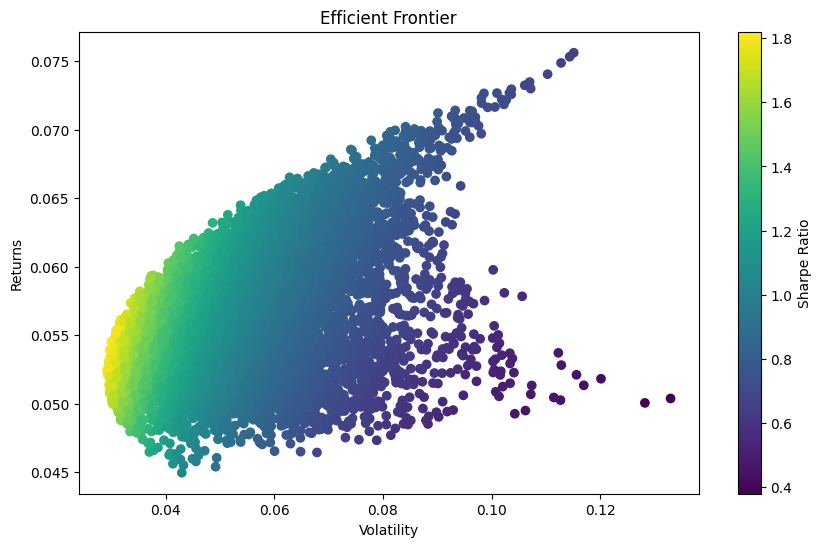

In [661]:
# Set risk-free rate (rf) based on your financial context
rf = 0.04  # Replace with the appropriate risk-free rate

# Generate a large number of random portfolios
num_portfolios = 10000
portfolios = generate_portfolios(asset_class_df, num_portfolios)

# Plot the efficient frontier
plot_efficient_frontier(portfolios)



In [662]:

# Find and print the optimal portfolio
pd.set_option('display.max_colwidth', None)

optimal_portfolio = find_optimal_portfolio(portfolios)

print(optimal_portfolio)

Returns                                                                                   0.059322
Volatility                                                                                0.037304
Weights       [0.7935207557172317, 0.1553884108226648, 0.022712228525535845, 0.028378604934567685]
Assets                                                                                [0, 1, 2, 3]
Name: 3779, dtype: object


In [683]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def generate_portfolios(asset_data, num_portfolios):
    portfolios = []
    asset_names = asset_data.index.tolist()  # Get the asset names/index labels
    for _ in range(num_portfolios):
        weights = np.random.random(len(asset_data))
        weights /= np.sum(weights)  # Normalize weights to sum to 1
        returns = np.dot(weights, asset_data['Returns'])
        volatility = np.sqrt(np.dot(weights ** 2, asset_data['Volatility'] ** 2))
        portfolios.append({'Returns': returns, 'Volatility': volatility, 'Weights': weights, 'Assets': asset_names})
    return pd.DataFrame(portfolios)

def plot_efficient_frontier(portfolios):
    plt.figure(figsize=(10, 6))
    plt.scatter(portfolios['Volatility'], portfolios['Returns'], c=portfolios['Returns'] / portfolios['Volatility'], marker='o', cmap='viridis')
    plt.title('Efficient Frontier')
    plt.xlabel('Volatility')
    plt.ylabel('Returns')
    plt.colorbar(label='Sharpe Ratio')
    plt.show()

def find_optimal_portfolio(portfolios, lower_band, upper_band):
    # Filter portfolios based on target risk (e.g., within 0.001 tolerance)
    filtered_portfolios = portfolios[(portfolios['Volatility'] * 100 <= upper_band) & (portfolios['Volatility'] * 100 >= lower_band)]
    
    if filtered_portfolios.empty:
        print('DOG')
        return None  # No portfolios meet the target risk
    
    # Find and return the portfolio with the highest return among filtered portfolios
    optimal_portfolio = filtered_portfolios.iloc[filtered_portfolios['Returns'].idxmax()]
    return optimal_portfolio


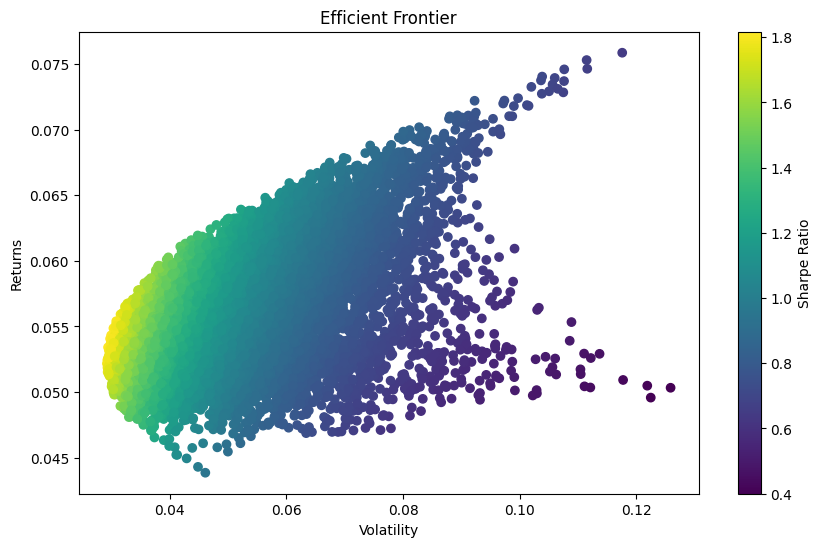

count    10000.000000
mean         0.055845
std          0.013545
min          0.029217
25%          0.046560
50%          0.054648
75%          0.063615
max          0.125868
Name: Volatility, dtype: float64
Returns                                                                                0.056049
Volatility                                                                              0.07756
Weights       [0.12249828289057728, 0.2125054333931641, 0.1510580766744681, 0.5139382070417904]
Assets                                                                             [0, 1, 2, 3]
Name: 7814, dtype: object


In [687]:

# Example usage
# asset_class_df is your DataFrame containing asset class data
# rf is the risk-free rate
num_portfolios = 10000
# Replace with your desired target risk level
portfolios = generate_portfolios(asset_class_df, num_portfolios)
portfolio_volatility_summary = portfolios["Volatility"].describe()
print(portfolio_volatility_summary)
# Plot the efficient frontier
plot_efficient_frontier(portfolios)

# Find and print the optimal portfolio for the given target risk
optimal_portfolio = find_optimal_portfolio(portfolios, 6,11)


print(optimal_portfolio)

